In [1]:
%pip install -Uqq fastai
%pip install duckduckgo_search

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:
from duckduckgo_search import ddg_images
from fastcore.all import *

In [8]:
def search_images(term, max_images=50):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results = max_images)).itemgot('image')

Searching for 'comedy movie posters'


C:\Users\david\anaconda3\Lib\site-packages\duckduckgo_search\compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


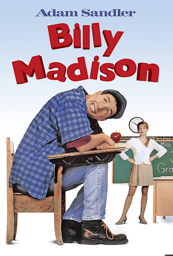

In [9]:
from fastdownload import download_url
urls = search_images('comedy movie posters', max_images=1)
dest = 'comedyMovie.jpg'
download_url(urls[0], dest, show_progress=True)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'action movie posters'


c:\Users\david\anaconda3\Lib\site-packages\duckduckgo_search\compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


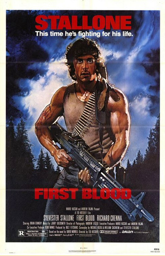

In [5]:
download_url(search_images('action movie posters', max_images=1)[0], 'actionMovie.jpg', show_progress=True)
Image.open('actionMovie.jpg').to_thumb(256,256)

Searching for 'romance movie posters'


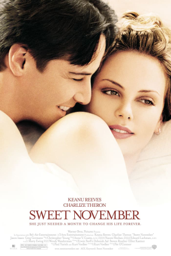

In [6]:
download_url(search_images('romance movie posters', max_images=1)[0], 'romanceMovie.jpg', show_progress=True)
Image.open('romanceMovie.jpg').to_thumb(256,256)

In [12]:
searches = 'romance movie posters', 'action movie posters', 'comedy movie posters'
path = Path('romance action or comedy')
from time import sleep

In [8]:
for term in searches:
    dest = (path/term)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{term}'))
    sleep(10)
    resize_images(path/term, max_size=400, dest=path/term)

Searching for 'romance movie posters'
Searching for 'action movie posters'
Searching for 'comedy movie posters'


In [9]:
failed = verify_images(get_image_files(path))
failed
failed.map(Path.unlink)
len(failed)

3

C:\Users\david\anaconda3\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


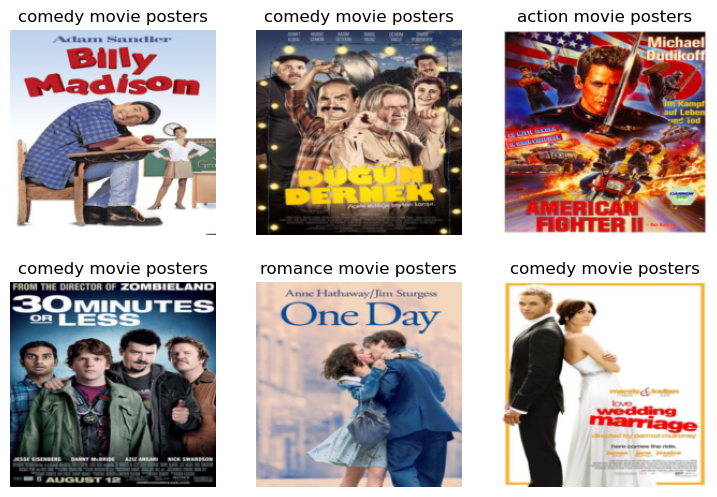

In [13]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [14]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(11)

epoch,train_loss,valid_loss,error_rate,time
0,1.731607,0.931446,0.375000,00:14


epoch,train_loss,valid_loss,error_rate,time
0,0.743306,0.542643,0.232143,00:21
1,0.525605,0.393096,0.142857,00:32
2,0.368001,0.418041,0.107143,00:22
3,0.282570,0.413298,0.107143,00:21
4,0.231043,0.441984,0.125000,00:20
5,0.193512,0.425516,0.125000,00:21
6,0.155589,0.385052,0.107143,00:21
7,0.129024,0.407010,0.142857,00:20
8,0.107521,0.424770,0.160714,00:21
9,0.092732,0.430780,0.125000,00:22


In [15]:
is_romance,_,probs = learn.predict(PILImage.create('romanceMovie.jpg'))
print(f"This is a: {is_romance}.")
print(f"Probability it's a romance movie: {probs[2]:.4f}")

This is a: romance movie posters.
Probability it's a romance movie: 1.0000


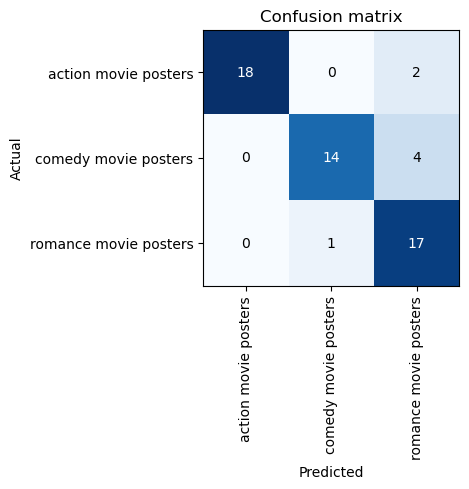

In [16]:

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [5]:
interp.plot_top_losses(5, nrows=3, figsize=(20,6))


NameError: name 'interp' is not defined

In [15]:

from fastai.vision.widgets import ImageClassifierCleaner
cleaner = ImageClassifierCleaner(learn)
cleaner

In [30]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [17]:
learn.export('model.pkl')